## CMSC 197 (Machine Learning)
<p>"Assignment 2 - Basic Data Processing Using Pandas"</p>
<p>by Hismaña, Nikko Gabriel (2009-48594)</p>

#### Importing Required packages

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# %matplotlib inline

#### Reading the CSV file

In [87]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [88]:
data.head(5)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0


#### <p style="color:red">Note: The movie titles have b'' or b"" in the titles</p>

#### Cleaning: Removing the b'' or b"" from the movie titles

In [89]:
# remove the leading b'' or b"" from the  movie titles using lstrip
data['movie_title'] = data['movie_title'].str.lstrip("b'b\"")
# remove the trailing ' or " from the movie titles using rstrip
data['movie_title'] = data['movie_title'].str.rstrip("'\"")

data.head(5)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,2,Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,3,The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,4,Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0


## 1. Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

In [90]:
# removing those with uknown directors ("0" as director)
remove_unknown_director =  data['director_name'] != "0"
# get the top 10 directors with most movies directed
top10_directors = data[remove_unknown_director].groupby('director_name').agg({'movie_title':'count'}).sort_values(by=['movie_title'], ascending=False).head(10)
top10_directors

,movie_title
director_name,
Steven Spielberg,26
Woody Allen,22
Clint Eastwood,20
Martin Scorsese,20
Ridley Scott,17
Steven Soderbergh,16
Spike Lee,16
Tim Burton,16
Renny Harlin,15


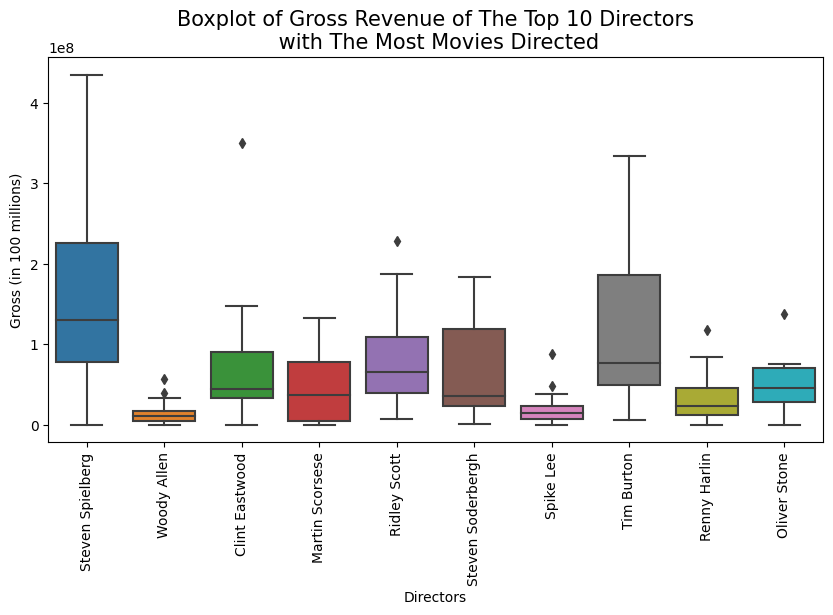

In [91]:
# create boxplot to show gross of top 10 directors in order of most movies directed
plt.figure(figsize=(10, 5))
# create boxplot, set order of directors (x-axis) by the number of movies directed
sns.boxplot(x='director_name', y='gross', data=data[remove_unknown_director], order=top10_directors.index)
# rotate x-axis labels
plt.xticks(rotation=90)
#labels and titles
plt.title("Boxplot of Gross Revenue of The Top 10 Directors\n with The Most Movies Directed",fontsize=15)
plt.xlabel("Directors")
plt.ylabel("Gross (in 100 millions)")

plt.show()

##### <i>Interpretation: This plot shows that Steven Spielberg has the highest gross earnings among the top 10 directors with most movies directed, while Woody Allen has the lowest despite being the top 2nd director with most movies directed.
#### <p style="color:red">Note: Gross in hundred millions of dollars (1e8 = 100 million), the dots refer to outliers </p> 

## 2. Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

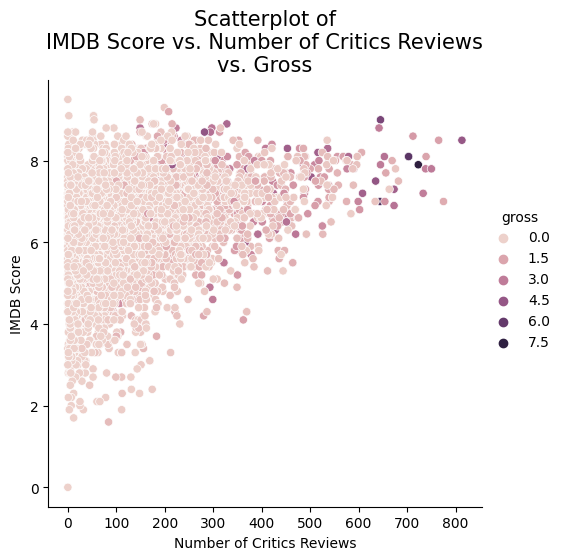

In [92]:
# seaborn graph of num_critic_for_reviews, imdb_score, and gross
sns.relplot(x='num_critic_for_reviews', y='imdb_score', hue='gross', data=data)
plt.title("Scatterplot of\nIMDB Score vs. Number of Critics Reviews\nvs. Gross", fontsize=15)
plt.xlabel("Number of Critics Reviews")
plt.ylabel("IMDB Score")
plt.show()

##### <i>Interpretation: This scatterplot suggests that there is a positive correlation between the number of critic reviews, the IMDB score, and the gross earnings of a movie. This is because the points are scattered in a way that shows that the higher the gross earnings of a movie (i.e. more people buy tickets to watch it), the higher the number of critic reviews and the IMDB score (see the upper right part of the graph where the gross is relatively higher than the left side that has fewer number of critics). <b>This suggests a few things:</b></i>
<li> The more popular the movie (in terms of gross ticket sales), the more people will rate it (number of critics) OR</li>
<li> The higher the IMDB score, the more people will watch the movie (gross ticket sales)</li>

## 3. Compute Sales (Gross - Budget), add it as another column

In [93]:
# create another column for sales (gross - budget)
data['sales'] = data['gross'] - data['budget']
# to test new sales column, show data set with the ff columns: movie title, gross, budget, and sales
data[['movie_title', 'gross', 'budget', 'sales']]

,movie_title,gross,budget,sales
0,Avatar,760505847.0,237000000.0,523505847.0
1,Pirates of the Caribbean: At World's End,309404152.0,300000000.0,9404152.0
2,Spectre,200074175.0,245000000.0,-44925825.0
3,The Dark Knight Rises,448130642.0,250000000.0,198130642.0
4,Star Wars: Episode VII - The Force Awakens ...,0.0,0.0,0.0
...,...,...,...,...
5039,The Following,0.0,0.0,0.0
5040,A Plague So Pleasant,0.0,1400.0,-1400.0
5041,Shanghai Calling,10443.0,0.0,10443.0
5042,My Date with Drew,85222.0,1100.0,84122.0


## 4. Which directors garnered the most total sales?

In [94]:
# rank all directors by sales
# use .agg to get the sum of sales, use remove_unknown_director to remove those with "0" as director
directors_by_sales = data[remove_unknown_director].groupby('director_name').agg({'sales':'sum'}).sort_values(by=['sales'], ascending=False)
directors_by_sales

,sales
director_name,
Steven Spielberg,2.451332e+09
George Lucas,1.386641e+09
James Cameron,1.199626e+09
Joss Whedon,1.000887e+09
Chris Columbus,9.417076e+08
...,...
Hayao Miyazaki,-2.444860e+09
Lajos Koltai,-2.499804e+09
Katsuhiro Ôtomo,-3.226670e+09


In [95]:
# show top 10 directors by sales 
# format without scientific notation, and with commas
directors_by_sales.head(10).style.format({'sales': "{:,.2f}".format})

,sales
director_name,
Steven Spielberg,"2,451,332,231.00"
George Lucas,"1,386,641,480.00"
James Cameron,"1,199,625,910.00"
Joss Whedon,"1,000,886,628.00"
Chris Columbus,"941,707,624.00"
Peter Jackson,"900,969,279.00"
Tim Burton,"824,275,480.00"
Christopher Nolan,"808,227,576.00"
Jon Favreau,"769,381,547.00"


## 5. Plot sales and average likes as a scatterplot. Fit it with a line.

In [96]:
# find all columns with "like" in the name
data.filter(regex='like').columns
print(data.filter(regex='like').columns)


Index(['director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'cast_total_facebook_likes',
       'actor_2_facebook_likes', 'movie_facebook_likes'],
      dtype='object')


In [97]:
# Create "Average Likes" (columns with "like" in the name)
# use .agg to get the mean of all likes
# create a new column for average likes
data['avg_likes'] = data.filter(regex='like').agg('mean', axis=1)

# create a new column containing likes (including the new avg_likes column)
like_columns = data.filter(regex='like').columns

# show data set with the movie_title column and all columns with "like" in the name
data[['movie_title'] + list(like_columns)]

,movie_title,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,actor_2_facebook_likes,movie_facebook_likes,avg_likes
0,Avatar,0.0,855.0,1000.0,4834.0,936.0,33000.0,6770.833333
1,Pirates of the Caribbean: At World's End,563.0,1000.0,40000.0,48350.0,5000.0,0.0,15818.833333
2,Spectre,0.0,161.0,11000.0,11700.0,393.0,85000.0,18042.333333
3,The Dark Knight Rises,22000.0,23000.0,27000.0,106759.0,23000.0,164000.0,60959.833333
4,Star Wars: Episode VII - The Force Awakens ...,131.0,0.0,131.0,143.0,12.0,0.0,69.500000
...,...,...,...,...,...,...,...,...
5039,The Following,0.0,319.0,841.0,1753.0,593.0,32000.0,5917.666667
5040,A Plague So Pleasant,0.0,0.0,0.0,0.0,0.0,16.0,2.666667
5041,Shanghai Calling,0.0,489.0,946.0,2386.0,719.0,660.0,866.666667
5042,My Date with Drew,16.0,16.0,86.0,163.0,23.0,456.0,126.666667


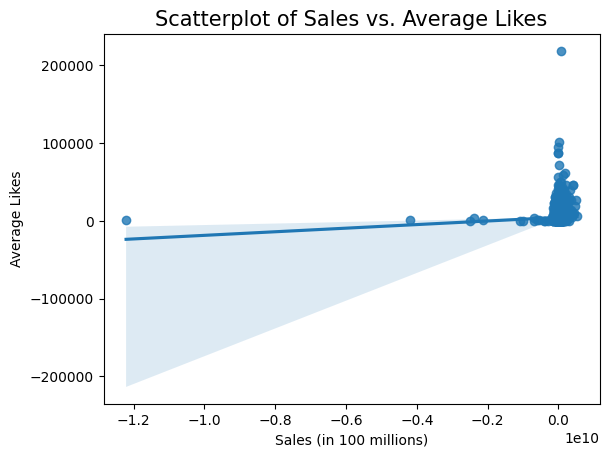

In [98]:
# scatterplot of sales and avg_likes, fitting with regression line
sns.regplot(x='sales', y='avg_likes', data=data)
plt.title("Scatterplot of Sales vs. Average Likes", fontsize=15)
plt.xlabel("Sales (in 100 millions)")
plt.ylabel("Average Likes")
plt.show()

##### <i>Interpretation: The scatterplot above suggests a positive correlation between the number of likes and the sales (gross LESS budget) of a movie. This is because the points are scattered in a way that shows that the higher the sales of a movie (i.e. more people buy tickets to watch it), the higher the average likes. <b>This suggests a few things:</b></i>
<li> The more popular the movie (in terms of gross ticket sales), the more people will like it (average likes) OR</li>
<li> The more people like the movie (average likes), the more people will watch the movie (gross ticket sales)</li>

## 6. Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

In [99]:
# filter the data to contain only the ff genres: Romance, Comedy, Action, Fantasy, and their sales
# this would filter out multi-genre movies (i.e. Romance|Comedy, Action|Fantasy)
selected_genres = ["Romance", "Comedy", "Action", "Fantasy"]

# calculate the total sales of each selected genre, sort by sales
genre_sales = data[data['genres'].isin(selected_genres)].groupby('genres').agg({'sales':'sum'}).sort_values(by=['sales'], ascending=False)

# format without scientific notation, and with commas
genre_sales.style.format({'sales': "{:,.2f}".format})

# total sales for each selected genre
genre_sales

,sales
genres,
Comedy,3.410157e+09
Fantasy,1.249586e+07
Romance,-7.293430e+07
Action,-2.333746e+08


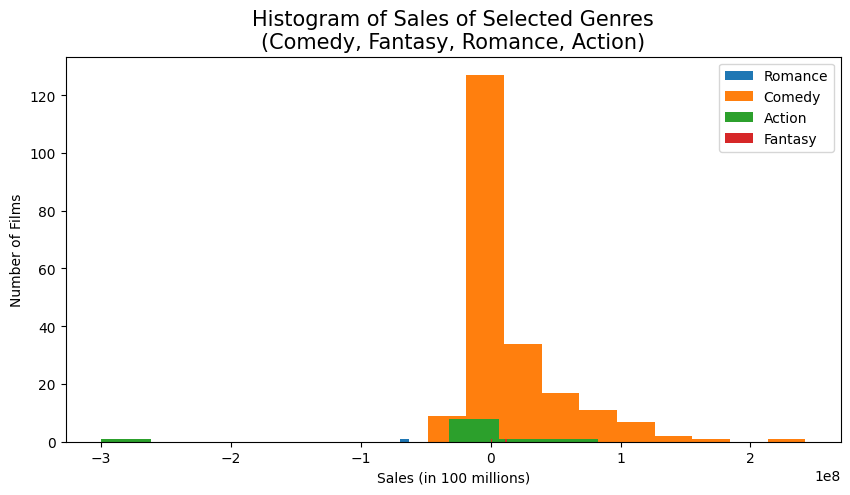

In [100]:
# create histogram plotting selected_genres sales
# all genres are superimposed on the same axis
plt.figure(figsize=(10, 5))

# use for loop to plot each genre
for genre in selected_genres:
    # filter the data to contain only the genre
    genre_data = data[data['genres'] == genre]
    # # plot histogram of sales
    plt.hist(genre_data['sales'], label=genre)

#labels and titles
plt.title("Histogram of Sales of Selected Genres\n(Comedy, Fantasy, Romance, Action)",fontsize=15)
plt.xlabel("Sales (in 100 millions)")
plt.ylabel("Number of Films")
plt.legend()
plt.show()
    

##### <i>Interpretation: With this histogram, Comedy is the most profitable genre, followed by Action, Fantasy, and Romance. This is also supported by the previous table.<p>Not only does Comedy have the highest number of movies, it also has the highest sales (gross LESS budget) among the other genres simply by looking at the histogram. This suggests that people prefer to watch comedy movies more than the other genres.</i></p>

## 7. For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [101]:
# store all columns with "actor facebook likes"
all_actors_likes = ['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']

# create new column that averages all actor facebook likes
# use .agg to get the mean of all actor facebook likes
data['avgerage_actor_likes'] = data[all_actors_likes].agg('mean', axis=1)

# show data set with the movie_title column,  all columns with "actor facebook likes", and the new avgerage_actor_likes column
data[['movie_title'] + all_actors_likes + ['avgerage_actor_likes']]

,movie_title,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,avgerage_actor_likes
0,Avatar,1000.0,936.0,855.0,930.333333
1,Pirates of the Caribbean: At World's End,40000.0,5000.0,1000.0,15333.333333
2,Spectre,11000.0,393.0,161.0,3851.333333
3,The Dark Knight Rises,27000.0,23000.0,23000.0,24333.333333
4,Star Wars: Episode VII - The Force Awakens ...,131.0,12.0,0.0,47.666667
...,...,...,...,...,...
5039,The Following,841.0,593.0,319.0,584.333333
5040,A Plague So Pleasant,0.0,0.0,0.0,0.000000
5041,Shanghai Calling,946.0,719.0,489.0,718.000000
5042,My Date with Drew,86.0,23.0,16.0,41.666667


## Copying the whole dataframe

In [102]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,avg_likes,avgerage_actor_likes
0,0,Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,6770.833333,930.333333
1,1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15818.833333,15333.333333
2,2,Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,18042.333333,3851.333333
3,3,The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,60959.833333,24333.333333
4,4,Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,69.500000,47.666667


## 8. Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [103]:
# list all columns that are numeric (integer or float)
# use DataFrame select dtypes pandas method to select all columns of certain dtype
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# normalize each numeric column using min-max normalization
# x_scaled = (x-x_min())/(x_max()-x_min())
for col in num_cols:
    numerator = df[col] - df[col].min()
    denom = df[col].max() - df[col].min()
    df[col] = numerator/denom

# show data set with normalized numerical cols, and only the columns that are numeric (integer or float) + movie title column
# remove the "Unnamed: 0" column which is a common issue in pandas
df[['movie_title'] + list(num_cols)].drop(columns=['Unnamed: 0'])

,movie_title,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,avg_likes,avgerage_actor_likes
0,Avatar,0.889299,0.941799,0.000000,0.037174,0.001563,1.000000,0.524454,0.007361,0.000000,0.603557,1.940158e-02,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.030964,0.004261
1,Pirates of the Caribbean: At World's End,0.371464,0.894180,0.024478,0.043478,0.062500,0.406840,0.278867,0.073622,0.000000,0.244664,2.455896e-02,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.072341,0.070229
2,Spectre,0.740467,0.783069,0.000000,0.007000,0.017188,0.263080,0.163258,0.017816,0.023256,0.196443,2.005649e-02,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.082510,0.017640
3,The Dark Knight Rises,1.000000,0.867725,0.956522,1.000000,0.042188,0.589253,0.677217,0.162561,0.000000,0.533794,2.046580e-02,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.278777,0.111450
4,Star Wars: Episode VII - The Force Awakens ...,0.000000,0.000000,0.005696,0.000000,0.000205,0.000000,0.000005,0.000218,0.000000,0.000000,0.000000e+00,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000318,0.000218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,The Following,0.052891,0.227513,0.000000,0.013870,0.001314,0.000000,0.043698,0.002669,0.023256,0.070949,0.000000e+00,0.000000,0.004328,0.789474,1.000000,0.091691,0.958898,0.027062,0.002676
5040,A Plague So Pleasant,0.015990,0.402116,0.000000,0.000000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000593,1.146085e-07,0.998512,0.000000,0.663158,0.000000,0.000046,0.958898,0.000012,0.000000
5041,Shanghai Calling,0.017220,0.529101,0.000000,0.021261,0.001478,0.000014,0.000743,0.003633,0.116279,0.001779,0.000000e+00,0.998016,0.005248,0.663158,0.146875,0.001891,0.958899,0.003963,0.003289
5042,My Date with Drew,0.052891,0.476190,0.000696,0.000696,0.000134,0.000112,0.002536,0.000248,0.000000,0.016601,9.004953e-08,0.994048,0.000168,0.694737,0.115625,0.001307,0.958905,0.000579,0.000191


# == END OF ASSIGNMENT 2 ==